# Espaço de Cores


## Exercício
Implemente o algortimo de conversão **<font color="red">R</font><font color="green">G</font><font color="blue">B</font>** para **HSV**, utilizando uma imagem de sua escolha.

Dicas:
* Você pode confirmar o resultado da sua conversão utilizando os métodos `minha_imagem_rgb.convert('HSV')` e `minha_imagem_hsv.convert('RGB')`, **considerando que as duas imagens são do PIL**, e depois convertendo-as para arrays do NumPy. Se as imagens forens iguais, sua conversão está correta;
* A operação $\frac{\Delta}{C_{max}}$ pode resultar em $\frac{0}{0}$. Neste caso, qualquer valor pode ser atribuído a $S$;
* Imagens do NumPy apresentam valores na faixa $[0; 1]$ (ou $[0; 255]$). Sendo assim, lembre-se de dividir $H$ por $360°$ (e depois multiplicar por $255$ caso seja um `np.uint8`).

0 0.0 1.0


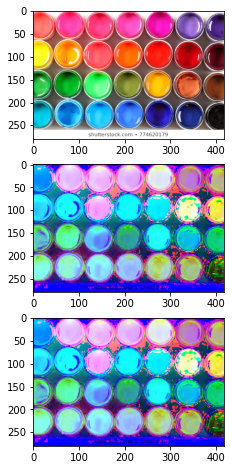

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open("colors_rgb.png")
img_rgb = np.array(img)
l, c, p = img_rgb.shape

img_hsv = np.zeros(shape=img_rgb.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        
        #Calculando R, G e B
        r = img_rgb[i, j, 0]/255
        g = img_rgb[i, j, 1]/255
        b = img_rgb[i, j, 2]/255
        
        Cmax = max(r,g,b)
        Cmin = min(r,g,b)
        delta = Cmax-Cmin
        
        if Cmax == 0:
            S = 0
        else:
            S = delta/Cmax
        
        V = Cmax
        
        if delta == 0:
            H = 0
        elif Cmax == r and g>=b:
            H = 60*((g-b)/delta)
        elif Cmax == r and g<b:
            H = 60*((g-b)/delta) + 360
        elif Cmax == g: 
            H = 60*((b-r)/delta) + 120
        elif Cmax == b:
            H = 60*((r-g)/delta) + 240
            
        img_hsv[i, j, 0] = (H /360)*255
        img_hsv[i, j, 1] = S * 255
        img_hsv[i, j, 2] = V * 255

img_cmy_verify = np.array(img.convert('HSV'))[:, :, :3]
print(H,S,V)                    
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.imshow(img_rgb)
plt.subplot(3, 1, 2)
plt.imshow(img_hsv)
plt.subplot(3,1,3)
plt.imshow(img_cmy_verify)

Transformando de RGB para CMY

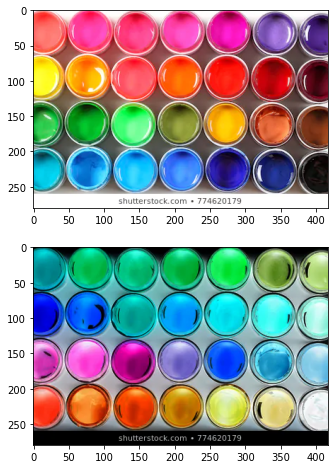

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_rgb = np.array(Image.open('colors_rgb.png'))

def cmy(img_rgb):
    l, c, p = img_rgb.shape
    
    img_cmy = np.zeros(shape=img_rgb.shape, dtype=np.float64)
    for i in range(l):
        for j in range(c):
            r = img_rgb[i, j, 0]
            g = img_rgb[i, j, 1]
            b = img_rgb[i, j, 2]
        
            img_cmy[i, j, 0] = (255 - r) / 255 # C, normalizando para uma faixa de 0 a 1 (0% a 100%)
            img_cmy[i, j, 1] = (255 - g) / 255 # M
            img_cmy[i, j, 2] = (255 - b) / 255 # Y
            
    return img_cmy

img_cmy = cmy(img_rgb)
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(img_rgb)
plt.subplot(2, 1, 2)
plt.imshow(img_cmy)